#Models d'Intel·ligència Artificial

##Segon lliurament

Aquesta tasca conté tres preguntes: una d'agents (6 punts), una de PDDL (2 punts) i una de lògica difusa (2 punts).

# 1. Agent per objectius

A l'activitat d'aprenentatge teniu un agent per resoldre graelles de **tangram** com els del puzzle 150deff5, el cinquè exemple de [arcprize.org](https://arcprize.org/).
Completau l'agent que teniu començat a l'**activitat d'aprenentatge** seguint les indicacions següents.

a) Comprovau que l'agent ja resol correctament el segon exemple d'entrenament, però no el primer ni el tercer.

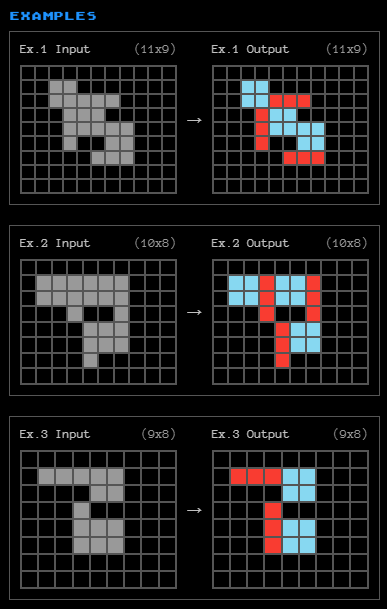

b) Ha de ser capaç de trobar solucions que incloguin barres horitzontals de 3x1 cel·les. Comprovau que amb aquesta modificació l'agent resol tots els exemples d'entrenament.

c) Ha de mostrar per la consola si ha aconseguit l'objectiu, i amb quantes solucions diferents.

d) Comprovau que la solució a l'exemple de test també és correcta.

e) Pensau una graella d'entrada que no tengui solució, i una altra que tengui més d'una solució. La resposta de l'agent en aquests casos és correcta?

f) Escriviu funcions que mostrin les graelles amb gràfics de colors, com als exemples de la web arcprize.org.

## **Respuesta apartado a)**

In [ ]:
import numpy as np
import itertools

# Simulamos los 3 grids de ejemplo
shadow_grid_ex_1 = np.array([[0,0,0,0,0,0,0,0,0,0],
                          [0,0,1,1,0,0,0,0,0,0],
                          [0,0,1,1,1,1,1,0,0,0],
                          [0,0,0,1,1,1,0,0,0,0],
                          [0,0,0,1,1,1,1,1,0,0],
                          [0,0,0,1,0,0,1,1,0,0],
                          [0,0,0,0,0,1,1,1,0,0],
                          [0,0,0,0,0,0,0,0,0,0]
                          ])

shadow_grid_ex_2 = np.array([[0,0,0,0,0,0,0,0,0,0],
                          [0,1,1,1,1,1,1,0,0,0],
                          [0,1,1,1,1,1,1,0,0,0],
                          [0,0,0,1,0,0,1,0,0,0],
                          [0,0,0,0,1,1,1,0,0,0],
                          [0,0,0,0,1,1,1,0,0,0],
                          [0,0,0,0,1,0,0,0,0,0],
                          [0,0,0,0,0,0,0,0,0,0]
                          ])

shadow_grid_ex_3  = np.array([[0,0,0,0,0,0,0,0,0,0],
                          [0,1,1,1,1,1,0,0,0,0],
                          [0,0,0,0,1,1,0,0,0,0],
                          [0,0,0,1,0,0,0,0,0,0],
                          [0,0,0,1,1,1,0,0,0,0],
                          [0,0,0,1,1,1,0,0,0,0],
                          [0,0,0,0,0,0,0,0,0,0],
                          [0,0,0,0,0,0,0,0,0,0]
                          ])

In [ ]:
def fit_squares(grid):
  # Retorna una llista de graelles amb un quadrat de 2x2 que encaixa dins l'ombra.
  rows,cols=grid.shape

  square_list=[]
  for r in range(rows-1):
    for c in range(cols-1):
      if grid[r,c]!=0 and grid[r+1,c]!=0 and grid[r,c+1]!=0 and grid[r+1,c+1]!=0:
        h = np.zeros(grid.shape)
        h[r,c]=1
        h[r+1,c]=1
        h[r,c+1]=1
        h[r+1,c+1]=1
        square_list.append(h)

  return square_list


def fit_vertical_bars(grid):
  # Retorna una llista de graelles amb una barra de mida 3x1 dins l'ombra.
  rows,cols=grid.shape

  v_bar_list = []

  for r in range(rows-2):
    for c in range(cols):
      if grid[r,c]!=0 and grid[r+1,c]!=0 and grid[r+2,c]!=0:
        h = np.zeros(grid.shape)
        h[r,c]=1
        h[r+1,c]=1
        h[r+2,c]=1
        v_bar_list.append(h)

  return v_bar_list

# A partir de una función generamos la respuesta sobre la posible solución de cada grid.
def find_grid_solution(grid, grid_num):
  is_equal = False
  sq = fit_squares(grid)
  vb = fit_vertical_bars(grid)
  block_list = sq+vb
  peces = np.array(block_list)

  N = peces.shape[0] # nombre de peces candidates

  for selector_de_peces in itertools.product([0,1], repeat=N): # cada peça pot ser-hi o no, generam totes les combinacions possibles
      suma_de_peces = np.sum(peces[np.array(selector_de_peces, dtype=bool)], axis=0)
      if  np.array_equal(suma_de_peces, grid):
        is_equal = True
        print(f"¡Solucionado el grid {grid_num}!")
        print(selector_de_peces, "\n")
        return is_equal

In [ ]:
# Iteramos sobre los posibles grids y llamamos a la función imprimiendo la respuesta
grids = [shadow_grid_ex_1, shadow_grid_ex_2, shadow_grid_ex_3]

for i, grid in enumerate(grids, 1):
  if not find_grid_solution(grid, i):
    print(f"No se ha encontrado la solución del grid {i}\n")

No se ha encontrado la solución del grid 1

¡Solucionado el grid 2!
(1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1) 

No se ha encontrado la solución del grid 3



## **Respuesta apartado b), c), d), e), f)**

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib import colors

# Simulamos los 3 grids de ejemplo
grid_input_ex_1 = np.array([[0,0,0,0,0,0,0,0,0,0,0],
                            [0,0,1,1,0,0,0,0,0,0,0],
                            [0,0,1,1,1,1,1,0,0,0,0],
                            [0,0,0,1,1,1,0,0,0,0,0],
                            [0,0,0,1,1,1,1,1,0,0,0],
                            [0,0,0,1,0,0,1,1,0,0,0],
                            [0,0,0,0,0,1,1,1,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0,0]
                            ])

grid_input_ex_2 = np.array([[0,0,0,0,0,0,0,0,0,0],
                            [0,1,1,1,1,1,1,0,0,0],
                            [0,1,1,1,1,1,1,0,0,0],
                            [0,0,0,1,0,0,1,0,0,0],
                            [0,0,0,0,1,1,1,0,0,0],
                            [0,0,0,0,1,1,1,0,0,0],
                            [0,0,0,0,1,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0]
                            ])

grid_input_ex_3 = np.array([[0,0,0,0,0,0,0,0,0],
                            [0,1,1,1,1,1,0,0,0],
                            [0,0,0,0,1,1,0,0,0],
                            [0,0,0,1,0,0,0,0,0],
                            [0,0,0,1,1,1,0,0,0],
                            [0,0,0,1,1,1,0,0,0],
                            [0,0,0,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0]
                            ])

grid_input_test = np.array([[0,0,1,1,0,1,1,1,0,0,0],
                            [0,0,1,1,0,0,1,0,0,0,0],
                            [0,1,1,1,1,1,1,0,0,0,0],
                            [0,0,0,0,1,1,1,0,0,0,0],
                            [0,0,0,1,1,1,0,0,0,0,0],
                            [0,0,0,0,0,1,1,0,0,0,0],
                            [0,0,0,0,0,1,1,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0,0]
                            ])

grid_input_no_solution = np.array([[0,0,0,0,0],
                                    [0,1,1,1,0],
                                    [0,0,1,1,0],
                                    [0,0,0,1,0],
                                    [0,0,0,1,0],
                                    [0,0,0,0,0],
                                    ])

grid_input_multiple_solution = np.array([[1,1,1,1,1],
                                          [1,1,1,1,1],
                                          [0,0,0,0,0],
                                          [0,0,0,0,0],
                                          [0,0,0,0,0],
                                          ])

In [ ]:
# Definición de funciones

def fit_squares(grid):
  # Retorna una lista de grids con un cuadrado de 2x2
  rows,cols=grid.shape

  square_list=[]
  for r in range(rows-1):
    for c in range(cols-1):
      if grid[r,c]!=0 and grid[r+1,c]!=0 and grid[r,c+1]!=0 and grid[r+1,c+1]!=0:
        h = np.zeros(grid.shape)
        h[r,c]=1
        h[r+1,c]=1
        h[r,c+1]=1
        h[r+1,c+1]=1
        square_list.append(h)

  return square_list


def fit_vertical_bars(grid):
  # Retorna una lista de grids con una barra de 3x1 (vertical)
  rows,cols=grid.shape

  v_bar_list = []

  for r in range(rows-2):
    for c in range(cols):
      if grid[r,c]!=0 and grid[r+1,c]!=0 and grid[r+2,c]!=0:
        h = np.zeros(grid.shape)
        h[r,c]=1
        h[r+1,c]=1
        h[r+2,c]=1
        v_bar_list.append(h)

  return v_bar_list

def fit_horizontal_bars(grid):
  # Retorna una lista de grids con una barra de 1x3 (horizontal)
  rows,cols=grid.shape

  h_bar_list = []

  for r in range(rows):
    for c in range(cols-2):
      if grid[r,c]!=0 and grid[r,c+1]!=0 and grid[r,c+2]!=0:
        h = np.zeros(grid.shape)
        h[r,c]=1
        h[r,c+1]=1
        h[r,c+2]=1
        h_bar_list.append(h)

  return h_bar_list

def plot_multiple_grids(grids):
    input_cmap = colors.ListedColormap(['#000000', '#A9A9A9'])
    output_cmap = colors.ListedColormap(['#000000', '#88D8F1', '#F93B30'])

    norm = colors.Normalize(vmin=0, vmax=2)
    fig, axs = plt.subplots(6, 2, figsize=(15, 15))

    for i in range(6):
      # Input
      axs[i, 0].imshow(grids[2 * i], cmap=input_cmap, norm=norm)
      axs[i, 0].set_title(f"Grid {i} - input")
      axs[i, 0].set_xticks(np.arange(-0.5, grids[2 * i].shape[1], 1), minor=False)
      axs[i, 0].set_yticks(np.arange(-0.5, grids[2 * i].shape[0], 1), minor=False)
      axs[i, 0].grid(True, which="both", color="grey", linestyle="-", linewidth=0.7)
      axs[i, 0].set_aspect('equal')

      # Output
      axs[i, 1].imshow(grids[2 * i + 1], cmap=output_cmap, norm=norm)
      axs[i, 1].set_title(f"Grid {i} - output")
      axs[i, 1].set_xticks(np.arange(-0.5, grids[2 * i + 1].shape[1], 1), minor=False)
      axs[i, 1].set_yticks(np.arange(-0.5, grids[2 * i + 1].shape[0], 1), minor=False)
      axs[i, 1].grid(True, which="both", color="grey", linestyle="-", linewidth=0.7)
      axs[i, 1].set_aspect('equal')

    plt.tight_layout()
    plt.show()

# A partir de una función generamos la respuesta sobre la posible solución de cada grid.
def find_grid_solution(grid):
  is_equal = False
  sq = fit_squares(grid)
  vb = fit_vertical_bars(grid)
  hb = fit_horizontal_bars(grid)
  block_list = sq+vb+hb
  pieces = np.array(block_list)

  N = pieces.shape[0]
  valid_piece_combinations = []

  for pieces_selector in itertools.product([0,1], repeat=N):
    sum_of_pieces = np.sum(pieces[np.array(pieces_selector, dtype=bool)], axis=0)
    if  np.array_equal(sum_of_pieces, grid):
      is_equal = True
      valid_piece_combinations.append(pieces_selector)

  return is_equal, valid_piece_combinations, pieces

¡Solucionado el grid 1!
Soluciones: [(1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)]
Número de soluciones: 1

¡Solucionado el grid 2!
Soluciones: [(1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)]
Número de soluciones: 1

¡Solucionado el grid 3!
Soluciones: [(1, 0, 1, 1, 1, 0, 0, 0, 0)]
Número de soluciones: 1

¡Solucionado el grid 4!
Soluciones: [(1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1)]
Número de soluciones: 1

No se ha encontrado la solución del grid 5

¡Solucionado el grid 6!
Soluciones: [(0, 0, 0, 1, 1, 0, 0, 1, 0, 0), (1, 0, 0, 0, 0, 0, 1, 0, 0, 1)]
Número de soluciones: 2



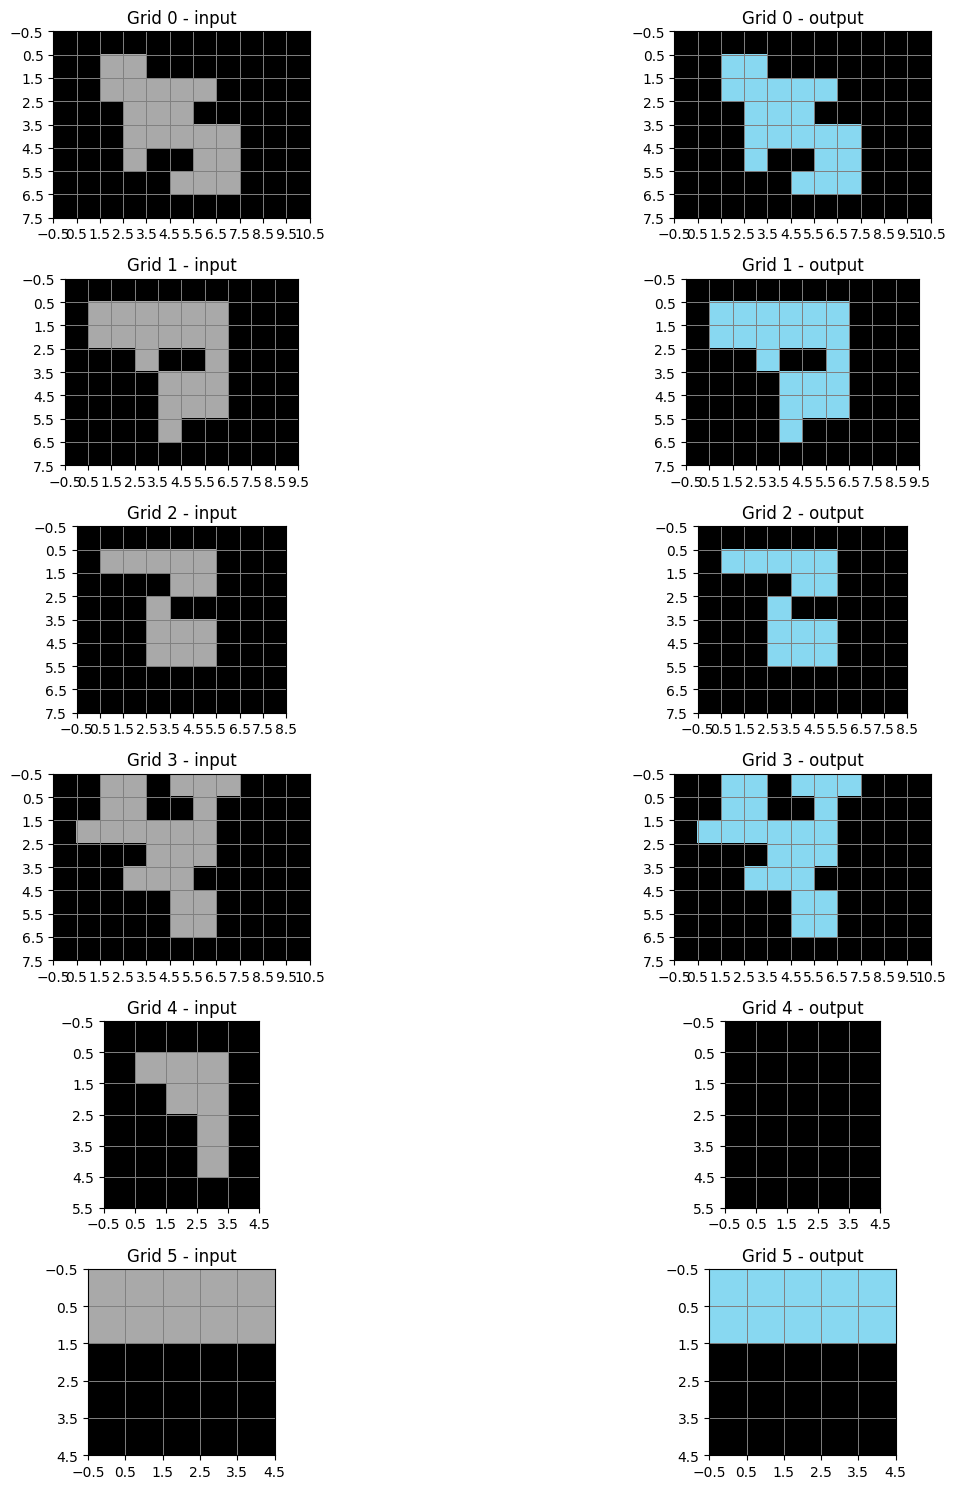

In [ ]:
# Iteramos sobre los posibles grids y llamamos a la función imprimiendo la respuesta
grids_input = [grid_input_ex_1, grid_input_ex_2, grid_input_ex_3, grid_input_test, grid_input_no_solution, grid_input_multiple_solution]
grids_output = []
combined_grids = []

for i, grid in enumerate(grids_input, 1):
  is_equal, valid_piece_combinations, pieces = find_grid_solution(grid)

  if is_equal:
    if valid_piece_combinations:
        solved_grid = np.sum(pieces[np.array(valid_piece_combinations[0], dtype=bool)], axis=0)
        grids_output.append(solved_grid)
    print(f"¡Solucionado el grid {i}!")
    print(f"Soluciones: {valid_piece_combinations}")
    print(f"Número de soluciones: {len(valid_piece_combinations)}\n")
  else:
    grids_output.append(np.zeros(grid.shape))
    print(f"No se ha encontrado la solución del grid {i}\n")

for input, output in zip(grids_input, grids_output):
  combined_grids.append(input)
  combined_grids.append(output)

plot_multiple_grids(combined_grids)

#2. PDDL

**a** Executau l'exemple de PDDL dels apunts a la pàgina web

http://editor.planning.domains/

i adjuntau una captura de la planificació que obteniu.




Después de añadir el siguiente código ofrecido en los apuntes he conseguido el resultado que se muestra en las capturas de pantalla.

## **Domain.pddl**

    (define (domain transport)
    (:predicates
        (A ?c ?r)
        (Dins ?c ?a)
        (Carrega ?c)
        (Avio ?a)
        (Aeroport ?r))
        
    (:action Carregar
        :parameters (?c ?a ?r)
        :precondition (and (A ?c ?r) (A ?a ?r) (Carrega ?c) (Avio ?a) (Aeroport ?r) )
        :effect(and (not(A ?c ?r)) (Dins ?c ?a)  ) )
        
        
    (:action Descarregar
        :parameters (?c ?a ?r)
        :precondition (and (Dins ?c ?a) (A ?a ?r) (Carrega ?c) (Avio ?a) (Aeroport ?r) )
        :effect(and (A ?c ?r) (not (dins ?c ?a))))
        
    (:action Volar
        :parameters (?a ?origen ?desti)
        :precondition (and (A ?a ?origen) (Avio ?a) (Aeroport ?origen) (Aeroport ?desti))
        :effect (and (not(A ?a ?origen)) (A ?a ?desti))))

## **Problem.pddl**
    (define (problem transport-mad-bcn)
    (:domain transport)
    (:objects A1 A2 C1 C2 MAD BCN)
    (:init
        (Avio A1)
        (Avio A2)
        (Carrega C1)
        (Carrega C2)
        (Aeroport MAD)
        (Aeroport BCN)
        (A A1 MAD)
        (A A2 BCN)
        (A C1 MAD)
        (A C2 BCN))
    (:goal (and (A C1 BCN) (A C2 MAD))))

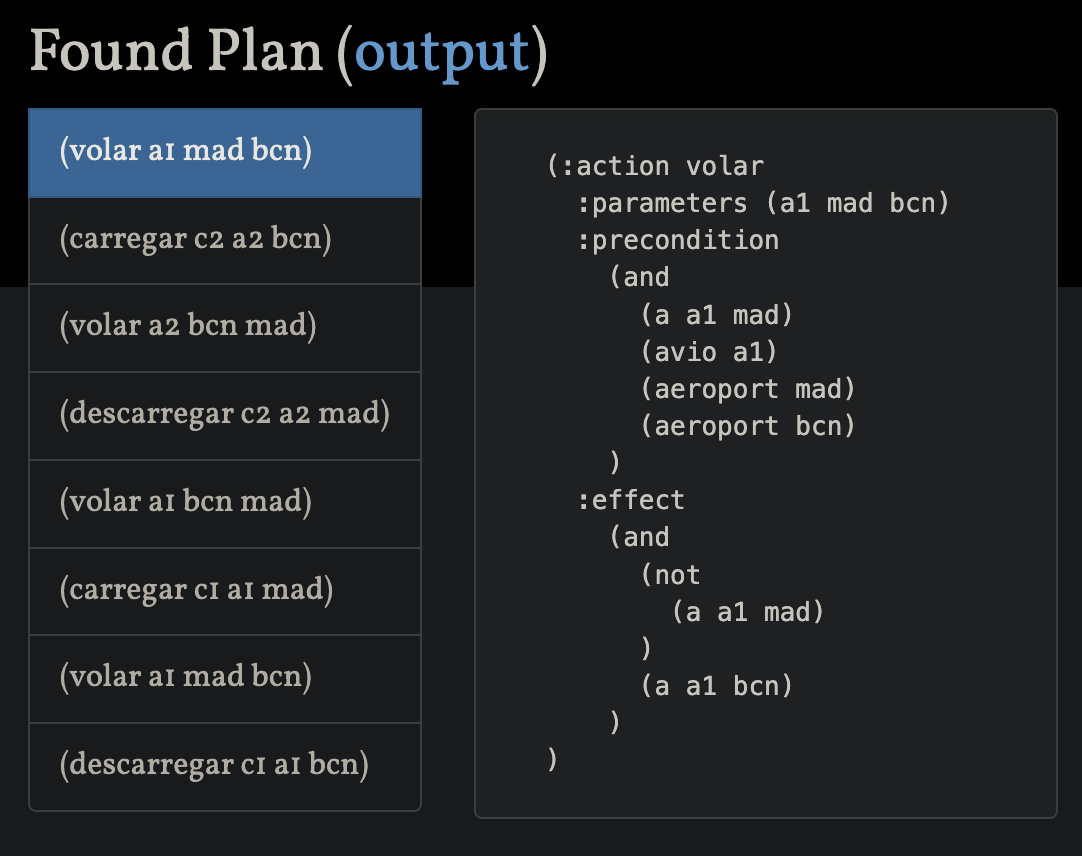

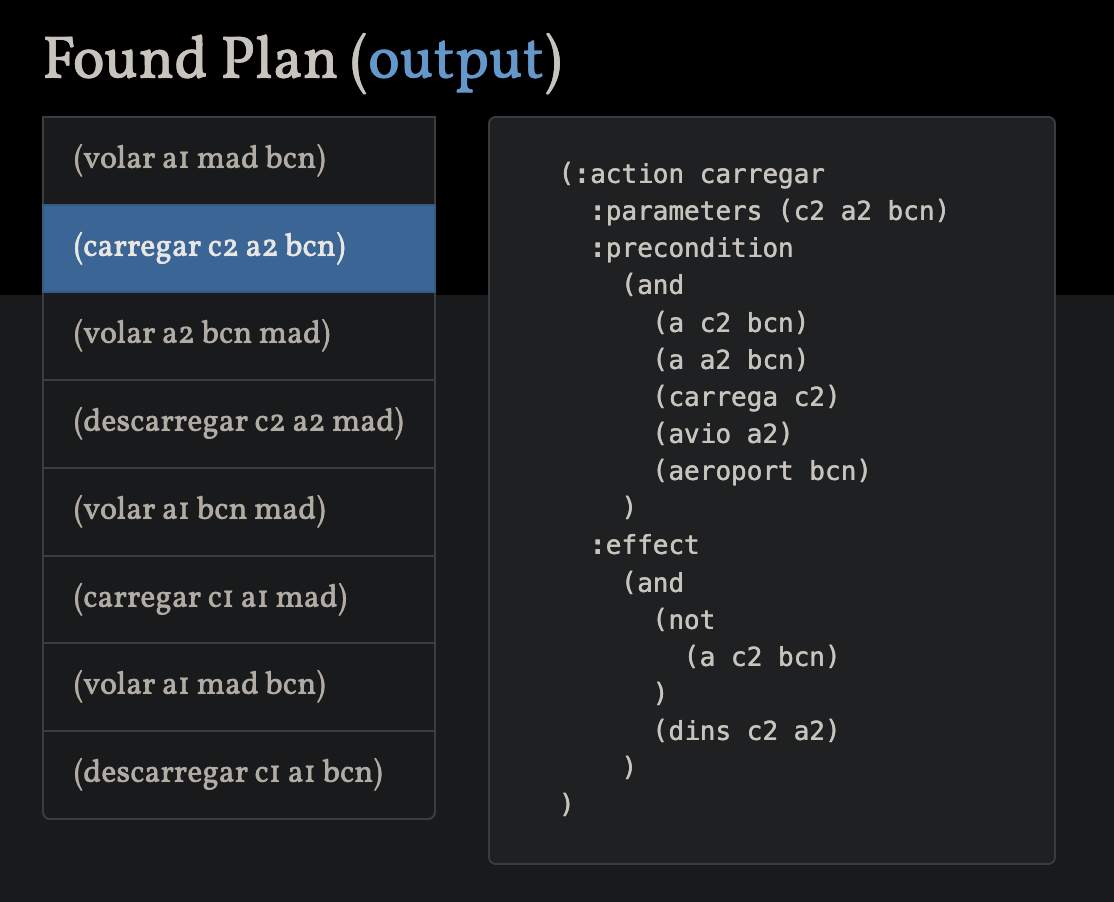

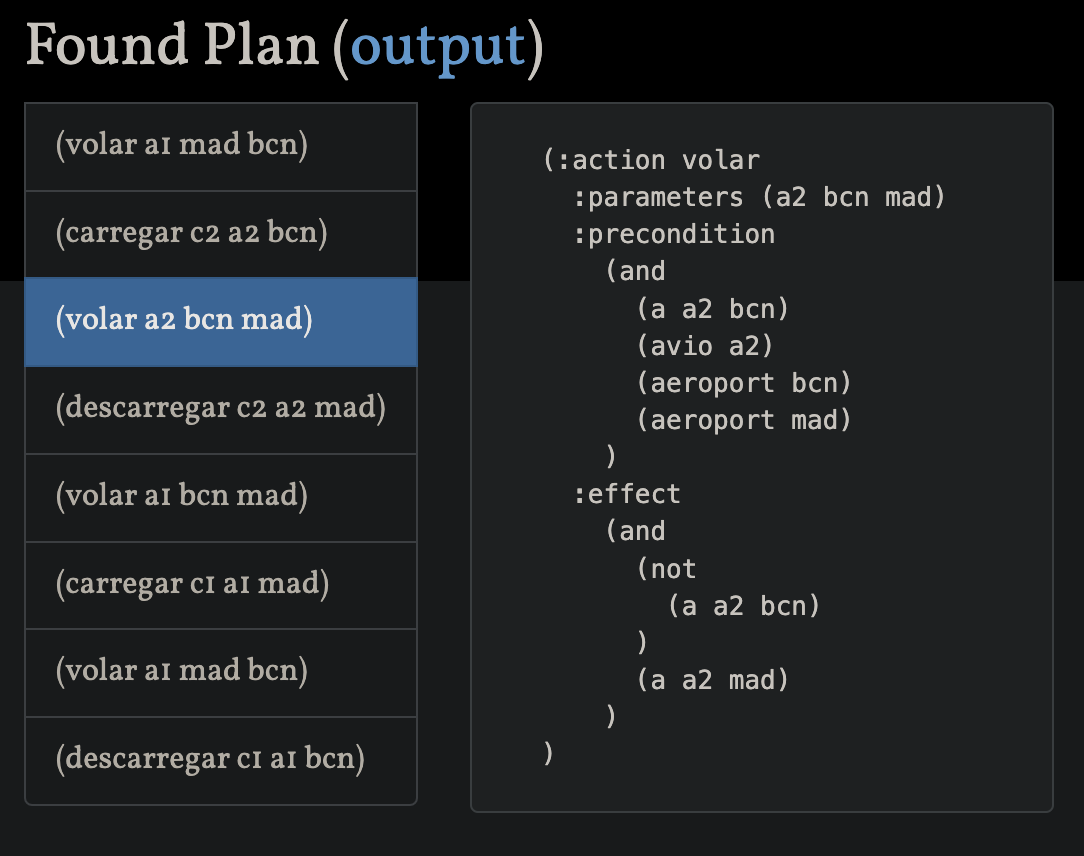

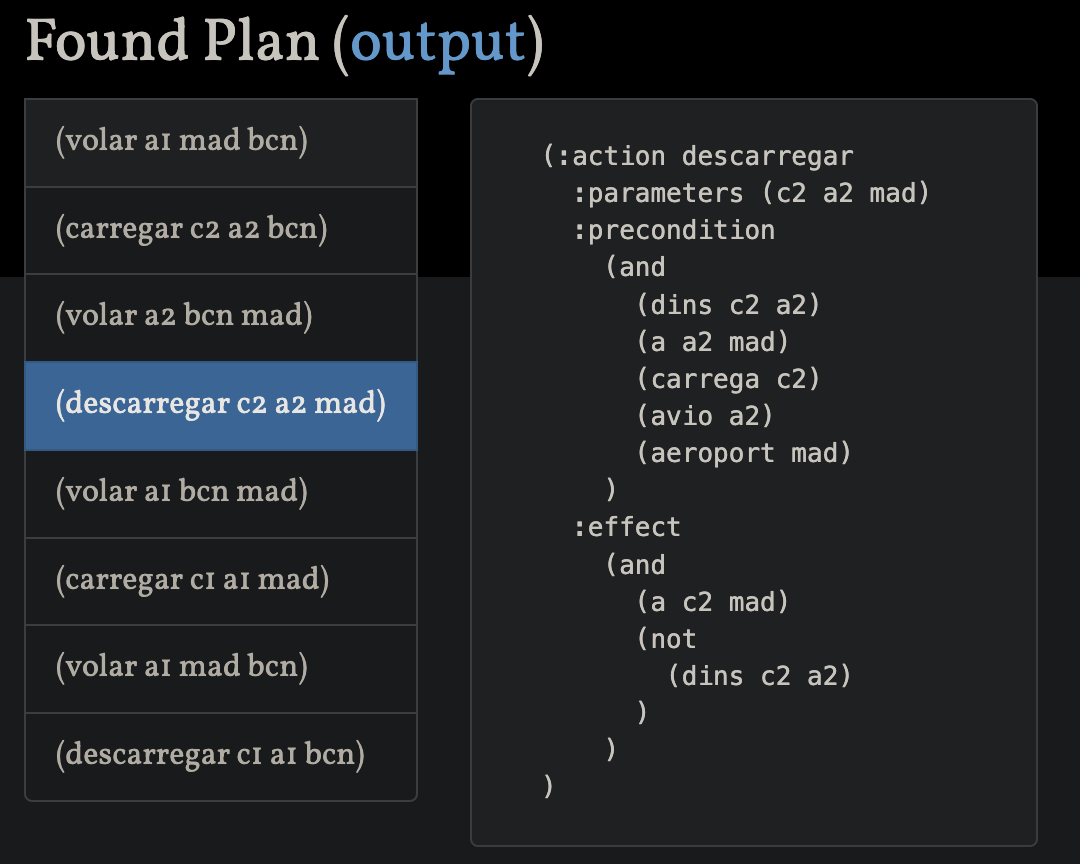

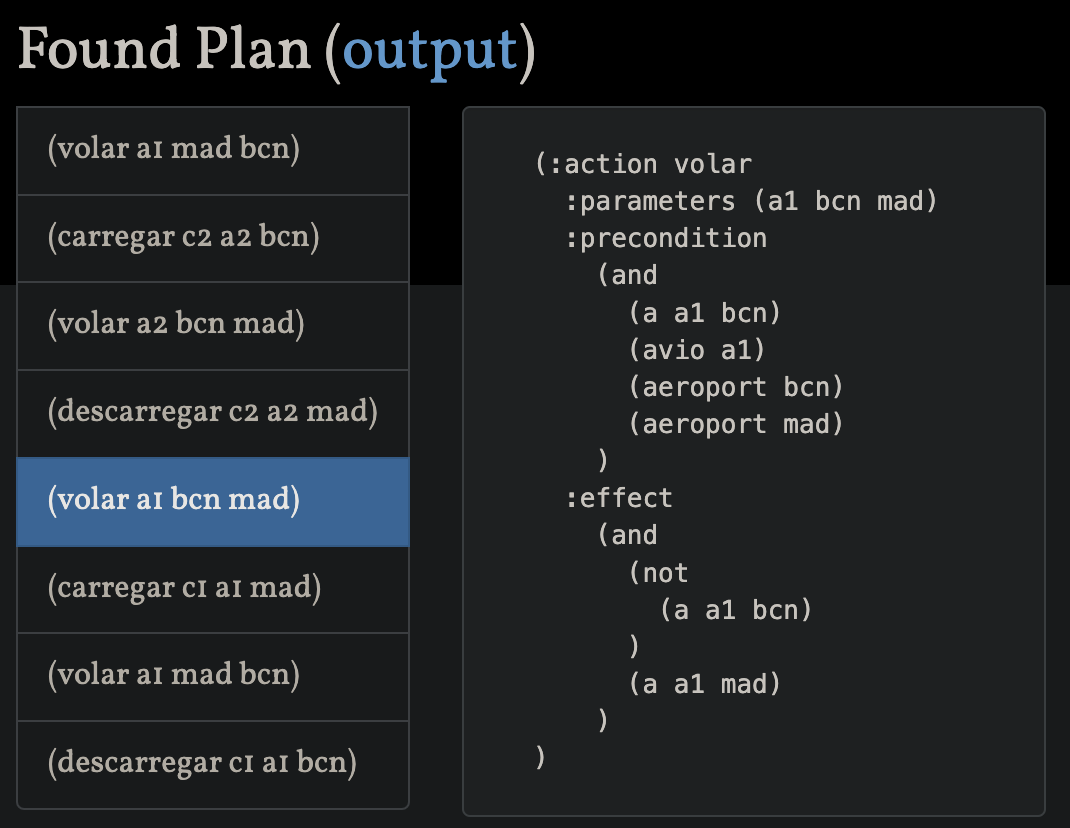

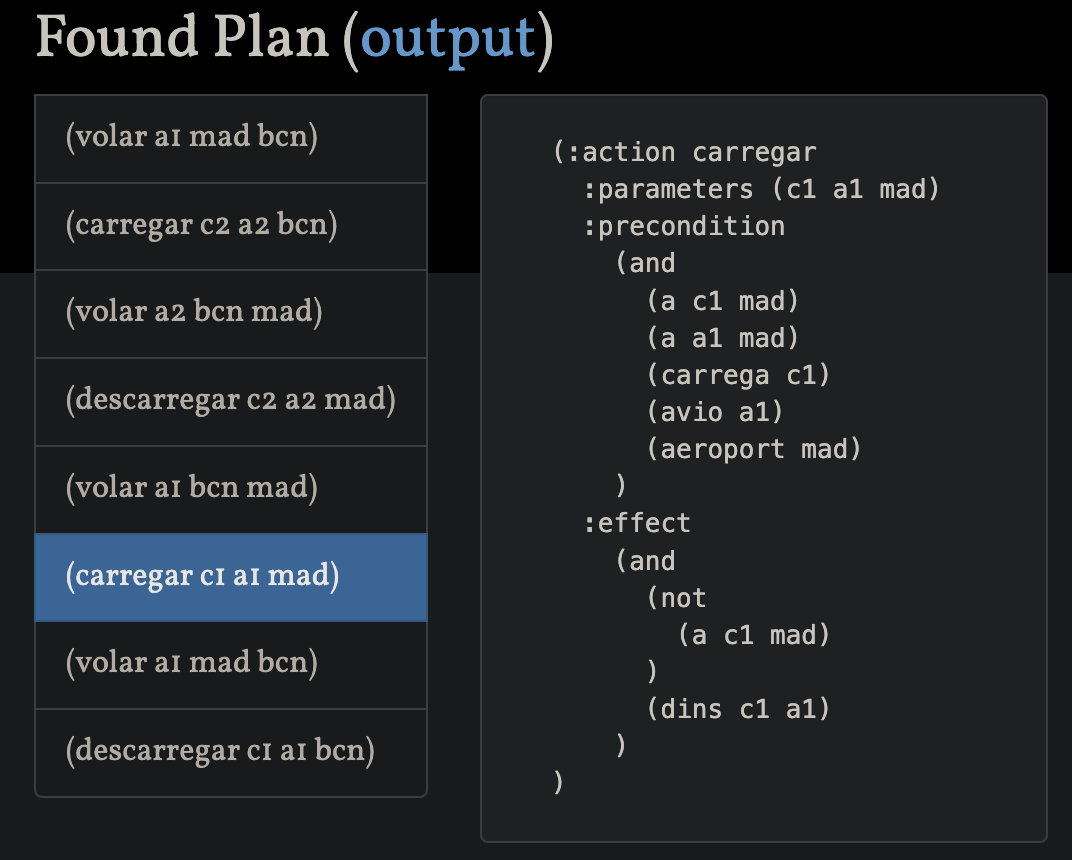

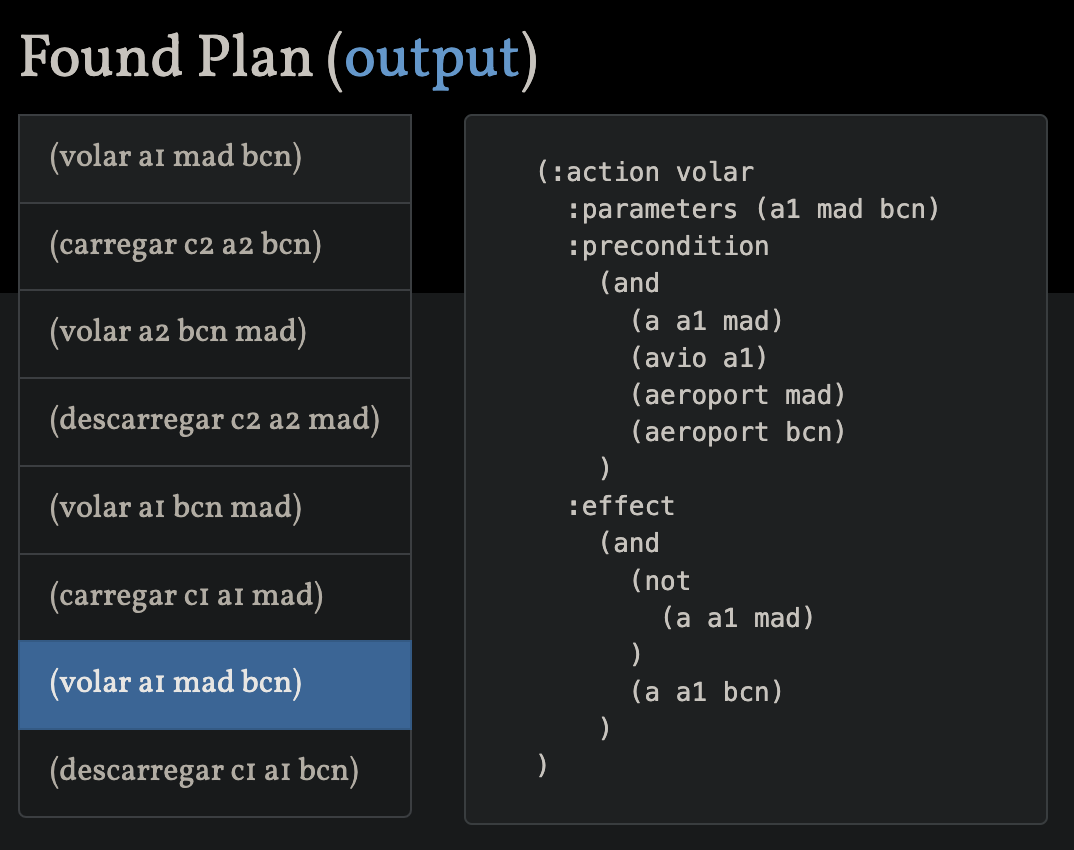

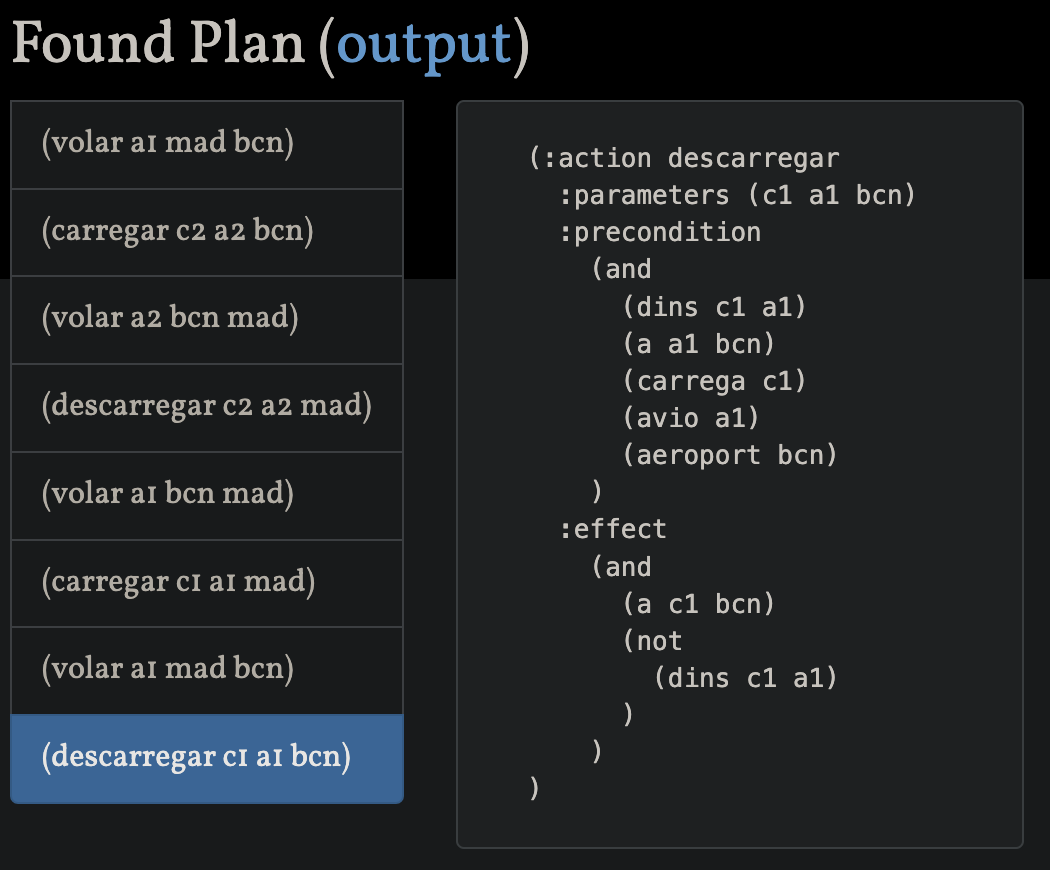

**b** Realitzau la mateixa planificació utilitzant les llibreries pddlpy (https://pypi.org/project/pddl/) i pyperplan comparau el resultat amb el de l'apartat anteriour. Escriviu el vostre codi a la cel·la de baix. Les planificacions que s'obtenen són iguals?

In [ ]:
!pip install pddlpy
!pip install pddl
!pip install pyperplan

In [ ]:
# Planificació usant pddlpy i pyperplan
from pddl.logic import Predicate, constants, variables
from pddl.core import Domain, Problem
from pddl.action import Action
from pddl.requirements import Requirements

# DOMAIN #
a, c, r, origen, destino = variables("a c r origen destino")

# Predicados
en = Predicate('En', c, r)
dentro = Predicate('Dentro', a, c)
carga = Predicate('Carga', c)
avion = Predicate('Avion', a)
aeropuerto = Predicate('Aeropuerto', r)

predicates = [en, dentro, carga, avion, aeropuerto]

# Acciones
cargar = Action(
    "Cargar",
    parameters=[c, a, r],
    precondition=en(c, r) & en(a, r) & carga(c) & avion(a) & aeropuerto(r),
    effect=~en(c, r) & dentro(c, a)
    )

descargar = Action(
    "Descargar",
    parameters=[c, a, r],
    precondition=dentro(c, a) & en(a, r) & en(c, r) & aeropuerto(r) & carga(c) & avion(a),
    effect=~dentro(c, a) & en(c, r)
)

volar = Action(
    "Volar",
    parameters=[a, origen, destino],
    precondition=en(a, origen) & avion(a) & aeropuerto(origen) & aeropuerto(destino),
    effect=~en(a, origen) & en(a, destino)
)

actions = [cargar, descargar, volar]
requirements = [Requirements.STRIPS, Requirements.TYPING]

transport = Domain(
    "transporte",
    requirements=requirements,
    predicates=predicates,
    actions=actions)

print(transport)


# PROBLEM #
a1, a2, c1, c2, mad, bcn = constants("a1 a2 c1 c2 mad bcn")
problem = Problem(
    "transporte-mad-bcn",
    domain=transport,
    objects=[a1, a2, c1, c2, mad, bcn],
    init=[avion(a1), avion(a2), aeropuerto(mad), aeropuerto(bcn), carga(c1), carga(c2), en(a1, mad), en(a2, bcn), en(c1, mad), en(c2, bcn)],
    goal=[en(c1, bcn), en(c2, mad)]
)

print(problem)

(define (domain transporte)
    (:requirements :strips :typing)
    (:predicates (Aeropuerto ?r)  (Avion ?a)  (Carga ?c)  (Dentro ?a ?c)  (En ?c ?r))
    (:action Cargar
        :parameters (?c ?a ?r)
        :precondition (and (En ?c ?r) (En ?a ?r) (Carga ?c) (Avion ?a) (Aeropuerto ?r))
        :effect (and (not (En ?c ?r)) (Dentro ?c ?a))
    )
     (:action Descargar
        :parameters (?c ?a ?r)
        :precondition (and (Dentro ?c ?a) (En ?a ?r) (En ?c ?r) (Aeropuerto ?r) (Carga ?c) (Avion ?a))
        :effect (and (not (Dentro ?c ?a)) (En ?c ?r))
    )
     (:action Volar
        :parameters (?a ?origen ?destino)
        :precondition (and (En ?a ?origen) (Avion ?a) (Aeropuerto ?origen) (Aeropuerto ?destino))
        :effect (and (not (En ?a ?origen)) (En ?a ?destino))
    )
)
(define (problem transporte-mad-bcn)
    (:domain transporte)
    (:requirements :strips :typing)
    (:objects a1 a2 bcn c1 c2 mad)
    (:init (Aeropuerto bcn) (Aeropuerto mad) (Avion a1) (Avion a2) (Car

In [ ]:
from google.colab import files

uploaded = files.upload()

# Guardar los archivos subidos en el entorno de Google Colab
for fn in uploaded.keys():
    with open(fn, "wb") as f:
        f.write(uploaded[fn])

Saving transporte-problem.pddl to transporte-problem.pddl
Saving transporte.pddl to transporte.pddl


In [ ]:
# A pesar del mensaje final de INFO sobre la validación el archivo .soln se genera sin problema
!pyperplan ./transporte.pddl ./transporte-problem.pddl

2024-11-20 12:12:00,875 INFO     using search: breadth_first_search
2024-11-20 12:12:00,875 INFO     using heuristic: None
2024-11-20 12:12:00,875 INFO     Parsing Domain /content/transporte.pddl
2024-11-20 12:12:00,876 INFO     Parsing Problem /content/transporte-problem.pddl
2024-11-20 12:12:00,876 INFO     5 Predicates parsed
2024-11-20 12:12:00,877 INFO     3 Actions parsed
2024-11-20 12:12:00,877 INFO     6 Objects parsed
2024-11-20 12:12:00,877 INFO     0 Constants parsed
2024-11-20 12:12:00,877 INFO     Grounding start: transporte-mad-bcn
2024-11-20 12:12:00,879 INFO     Relevance analysis removed 0 facts
2024-11-20 12:12:00,879 INFO     Grounding end: transporte-mad-bcn
2024-11-20 12:12:00,879 INFO     12 Variables created
2024-11-20 12:12:00,879 INFO     20 Operators created
2024-11-20 12:12:00,879 INFO     Search start: transporte-mad-bcn
2024-11-20 12:12:00,880 INFO     Goal reached. Start extraction of solution.
2024-11-20 12:12:00,880 INFO     57 Nodes expanded
2024-11-20 

In [ ]:
from google.colab import files

# Descargar el archivo generado
files.download("transporte-problem.pddl.soln")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Conclusión**

Al comparar los resultados generados por mi código con Pyperplan y la web, se observa que ambos siguen un enfoque similar, pero con algunas diferencias en el orden y la eficiencia. En mi código, las acciones son más directas, como (cargar a1 c1 mad) y (volar a1 mad bcn). Por otro lado, la web parece ser más impredecible con el orden de las acciones, ya que por ejemplo empieza con (volar a1 mad bcn) pero después vuelve a repetir la misma acción después de otras acciones con c2.

Ambos resultados son válidos y cumplen con el objetivo pero opino que el resultado ofrecido por la web es menos eficiente y más dispero comparado con le generado por el código. Principalmente por la repetición de acciones sin razón.

#3 Lògica difusa

A partir de l'exemple dels apunts del càlcul de la propina, obteniu una gràfica que mostri la forma de la funció que hem implementat. Es tracta d'obtenir una representació semblant a la de la figura. Aquest gràfic ens mostra la utilitat de la lògica difusa: definir una funció suau relativament complexa a partir de tot just algunes descripcions vagues, poc precises.

Aquí teniu la documentació per realitzar gràfics tridimensionals amb Python.

https://matplotlib.org/stable/gallery/mplot3d/index.html

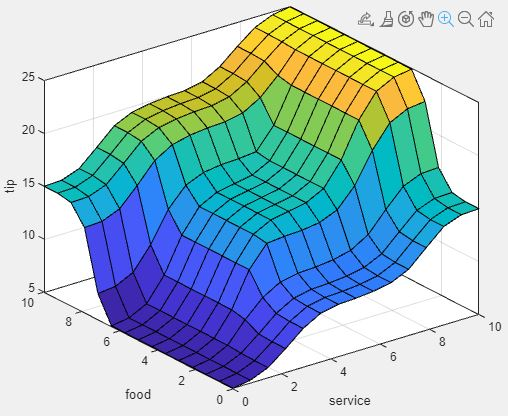

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.7 MB/s eta 0:00:00


In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

# Rango de valores de variables difusas
food_quality = ctrl.Antecedent(np.arange(0, 11),'food quality')
service_quality = ctrl.Antecedent(np.arange(0,11), 'service quality')
tip = ctrl.Consequent(np.arange(0,26),'tip')

# Generación automática de funciones de pertenencia
food_quality.automf(names=['bad', 'average', 'good'])
service_quality.automf(names=['poor', 'acceptable', 'incredible'])

# Definición de la función de pertenencia
tip['low'] = fuzz.trimf(tip.universe,[0,0,13])
tip['middle'] = fuzz.trimf(tip.universe,[0,13,25])
tip['high'] = fuzz.trimf(tip.universe, [13,25,25])

tipping = ctrl.ControlSystemSimulation(ctrl.ControlSystem([
    ctrl.Rule(food_quality['bad'] | service_quality['poor'], tip['low']),
    ctrl.Rule(service_quality['acceptable'] | service_quality['poor'], tip['low']),
    ctrl.Rule(food_quality['good'] | service_quality['incredible'], tip['high'])
]))

# Input para el sistema
tipping.inputs({
    'food quality':7,
    'service quality':6
})

tipping.compute()

print(tipping.output['tip'])

10.429100529100525


Creación de función de pertenencia visual

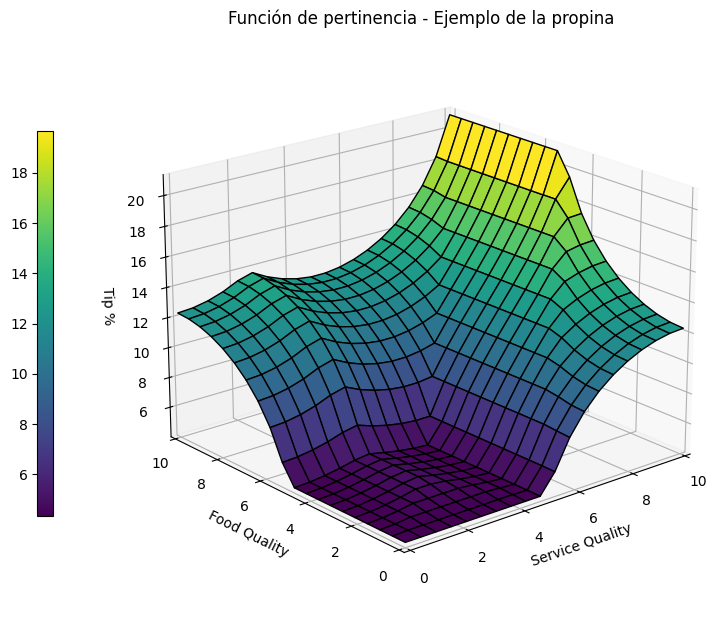

In [ ]:
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.ticker import LinearLocator

SAMPLES = 20

# Crea la malla
food_axis = np.linspace(0, 10, SAMPLES)
service_axis = np.linspace(0, 10, SAMPLES)
service_axis, food_axis = np.meshgrid(service_axis, food_axis)
tip_axis = np.zeros_like(food_axis)

for i in range(SAMPLES):
    for j in range(SAMPLES):
        tipping.input["food quality"] = food_axis[i, j]
        tipping.input["service quality"] = service_axis[i, j]
        tipping.compute()
        tip_axis[i, j] = tipping.output["tip"]

# Prepara la gráfica y los títulos de los ejes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.set_ylabel("Food Quality")
ax.set_xlabel("Service Quality")
ax.set_zlabel("Tip %")
ax.set_title("Función de pertinencia - Ejemplo de la propina")

# Ajusta los valores de los ejes y el ángulo de la vista
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.view_init(elev=20, azim=-130)

surf = ax.plot_surface(service_axis, food_axis, tip_axis, cmap="viridis", edgecolor="k")

# Barra de color
cbar = fig.colorbar(surf, shrink=0.5, aspect=25, location="left")

plt.show()

Comentario: No he conseguido que la zona máxima de la función aparezca como en el ejemplo situada en la